# Tarefa 2

Minimizar a função de 2 dimensões:

**f(x1,x2) = (1-x1)² + 100(x2-x1²)²**

> **Valor inicial:** Assumir [0,0]

> **teste de convergência:** tolerância -> tol = |f(xnovo) - f(xvelho)|
    parar quando a tolerância for menor que 1e-5
    
> **número máximo de passos:** interrompa a computação depois de 50.000 passos

## Implementação da descida do gradiente com gradiente explicito

In [1]:
import matplotlib.pyplot as plt

# Implementação do cálculo da função Rosenbrock, dados x1 e x2
def rosenbrock(x1,x2):
    rb = (1-x1)**2+100*(x2-x1**2)**2
    return rb

# Implementação do cálculo do gradiente da função Rosenbrock, dados x1 e x2
def grad(x1,x2):
    derx1=-400*x1*(x2-x1**2)-2*(1-x1)
    derx2=200*(x2-x1**2)
    return derx1,derx2

# Implementação do cálculo da descida do gradiente, dados x1, x2, learning rate,
#  taxa de atualização do learning rate e número de passos limite
def gd(x1, x2, lr, lr_tax, np_lim):
    fx = list()
    f_xv = rosenbrock(x1,x2)
    i = 0
    fx.append(f_xv)
    while i<np_lim:
        dx1, dx2 = grad(x1,x2)
        x1 = x1 - lr*dx1
        x2 = x2 - lr*dx2
        f_xn = rosenbrock(x1,x2)
        fx.append(f_xn)
        tol = abs(f_xn - f_xv)
        if tol < 1e-5:
            #print(f'i = {i}')
            break
        f_xv = f_xn
        lr = lr*lr_tax
        i = i + 1
    print(f'f(x) = {f_xn}')
    print(f'número de atualizações de x = {i+1}')
    print(f'x1 = {x1}')
    print(f'x2 = {x2}')
    plt.plot(fx)

# Atendendo às condições definidas para o problema
x1 = 0 # x1 inicial
x2 = 0 # x2 inicial
np_lim = 5e4 # número de passos limite

### Para learning rate de 1e-3

f(x) = 0.01055281795618874
número de atualizações de x = 3096
x1 = 0.8973659319527174
x2 = 0.8048289691500675


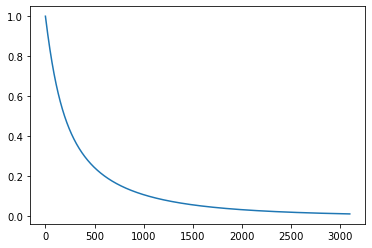

In [2]:
lr = 1e-3
lr_tax = 1 # learning rate se mantem igual
gd(x1,x2,lr,lr_tax,np_lim)

### Para learning rate de 1e-4

f(x) = 0.07731336295746909
número de atualizações de x = 12384
x1 = 0.7222519131907612
x2 = 0.520346429814203


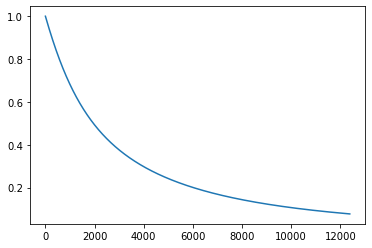

In [3]:
lr = 1e-4
lr_tax = 1 # learning rate se mantem igual
gd(x1,x2,lr,lr_tax,np_lim)

### Para learning rate de 1e-5

### Política de redução do learning rate

f(x) = 0.009252005608804341
número de atualizações de x = 1467
x1 = 0.9038989188801437
x2 = 0.8166259741217491


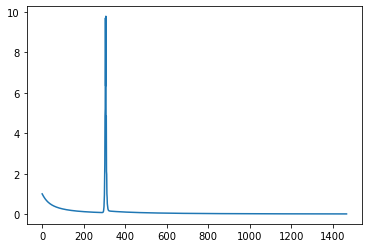

In [4]:
lr = 5e-3
lr_tax = 0.999 # learning rate é atualizado lr = lr * lr_tax
gd(x1,x2,lr,lr_tax,np_lim)

## Usando o tensorflow para calcular o gradiente

f(x) = 0.010552817833288833
número de atualizações de x = 3096
x1 = 0.8973659159988171
x2 = 0.8048289794258862


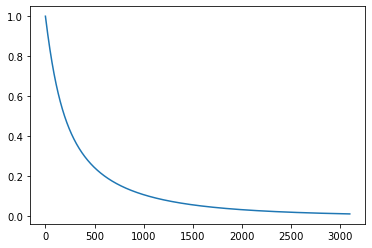

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

# Implementação do cálculo da função Rosenbrock, dados x1 e x2
def rosenbrock(x1,x2):
    rb = (1-x1)**2+100*(x2-x1**2)**2
    return rb

# Atendendo às condições definidas para o problema
x1 = 0 # x1 inicial
x2 = 0 # x2 inicial 

lr = 1e-3
lr_tax = 0.999 # learning rate é atualizado lr = lr * lr_tax
fx = list()
f_xv = rosenbrock(x1,x2)
i = 0
fx.append(f_xv)
while i<np_lim:
    x1_ = tf.Variable(float(x1), name='x1_', dtype=tf.float32, trainable=True)
    x2_ = tf.Variable(float(x2), name='x2_', dtype=tf.float32, trainable=True)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x1_)
        tape.watch(x2_)
        y = (1-x1_)**2+100*(x2_-x1_**2)**2
    dx1 = tape.gradient(y, x1_).numpy()
    dx2 = tape.gradient(y, x2_).numpy()
    x1 = x1 - lr*dx1
    x2 = x2 - lr*dx2
    f_xn = rosenbrock(x1,x2)
    fx.append(f_xn)
    tol = abs(f_xn - f_xv)
    if tol < 1e-5:
        #print(f'i = {i}')
        break
    f_xv = f_xn
#     lr = lr*lr_tax
    i = i + 1
print(f'f(x) = {f_xn}')
print(f'número de atualizações de x = {i+1}')
print(f'x1 = {x1}')
print(f'x2 = {x2}')
plt.plot(fx) 
